# Лабораторная работа 3

   по теме
                 
   **Регрессионная модель изменения цен на дома в Бостоне**

   Выполнил студент

   Группы БСТ1801

   Харатишвили Заза

In [4]:
## Импорт необходимых для работы библиотек
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

## Вывод данных из библиотек
print(train_data.shape)
print(test_data.shape)
print(test_targets)

## Нормализация данных
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

## Определяем функцию построения модели скалярной регрессии

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Указываем количество блоков перекрестной проверки
k = 4

## Указываем данные обучения модели
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

## Вызываем модели в цикле
for i in range(k):
    print('Номер прогона: ', i)
    # Подготовим тестовый прогон
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # Подготовим тренировочный прогон
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    out = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

# Построение графиков
plt.plot(out.history['mae'], 'g', label='Training acc')
plt.plot(out.history['val_mae'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(out.history['loss'], 'g', label='Training loss')
plt.plot(out.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print('Средняя ошибка: ', np.mean(all_scores))

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
Номер прогона:  0
Epoch 1/10
303/303 [==============================] - 0s 408us/step - loss: 198.4230 - mae: 10.4351
Epoch 2/10
303/303 [==============================] - 0s 398us/step - loss: 29.3348 - mae: 3.7313
Epoch 3/10
303/303 [==============================] - 0s 404us/step - loss: 22.3057 - mae: 3.1876
Epoch 4/10
303/303 [==============================] - 0s 421us/step - loss: 18.0044 - mae: 2.7862
Epoch 5/10
303/303 [==============================

KeyError: 'acc'

Теперь увеличим количество эпох обучения и проанализируем полученные результаты

In [15]:
## Указываем свойства обучения модели
num_val_samples = len(train_data) // k
num_epochs = 300
all_scores = []

## Вызываем модели в цикле
for i in range(k):
    print('Номер прогона: ', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print('Средняя ошибка: ', np.mean(all_scores))

Номер прогона:  0
Номер прогона:  1
Номер прогона:  2
Номер прогона:  3
Средняя ошибка:  2.6933032274246216


Теперь уменьшим количество эпох обучения и проанализируем полученные результаты

Номер прогона:  0


KeyError: 'val_mae'

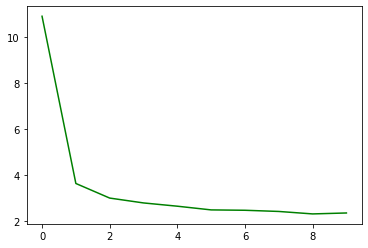

In [41]:
## Указываем данные обучения модели
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

## Вызываем модели в цикле
for i in range(k):
    print('Номер прогона: ', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    out = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Построение графиков
    plt.plot(out.history['mae'], 'g', label='Training mae')
    plt.plot(out.history['val_mae'], 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.legend()

    plt.figure()

    plt.plot(out.history['loss'], 'g', label='Training loss')
    plt.plot(out.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print('Средняя ошибка: ', np.mean(all_scores))